In [1]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

original_df=pd.read_csv('../data/zoo-animal-classification/zoo.csv', index_col=False)
class_names_df = pd.read_csv('../data/zoo-animal-classification/class.csv', index_col=False)
class_only = class_names_df[['Class_Number', 'Class_Type']]
class_only = class_only.rename(columns={'Class_Number': 'class_type', "Class_Type": "class_name"})
df = pd.merge(original_df, class_only, on='class_type', how='outer')
y=df['class_name']

df_class = df.copy()

del df['class_name']
del df['class_type']



df_bool = df.copy()
# df_bool

X_train, X_test, y_train, y_test = train_test_split(df_bool, y, test_size=0.33, random_state=1)
X_test_with_animal_name = X_test.copy()
del X_train['animal_name']
del X_test['animal_name']
df_bool.shape
X_train.shape

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dot_data = StringIO()
class_names=list(class_only['class_name'].unique())
class_names.sort()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names = X_train.columns, node_ids=True, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
accuracy_score(y_test, y_pred)

X_test_with_animal_name['y_pred']=y_pred
X_test_with_animal_name['y_test']=y_test
X_test_with_animal_name[X_test_with_animal_name['y_pred']!=X_test_with_animal_name['y_test']]

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dot_data = StringIO()
class_names=list(class_only['class_name'].unique())
class_names.sort()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names = X_train.columns, node_ids=False, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


class_names = list(class_only['class_name'])

class_names.sort()
class_names

del df_class['animal_name']

import matplotlib.pyplot as plt

def make_attribute_view(df_class, filename):
    gini_df = pd.DataFrame()
    oFig1 = plt.figure(1, figsize=(20,80))
       #(m,n,x) -> x starts with 1
    ...
    # iterating through every column in datafarme
    plot_index = 1
    
    for temp_class_name in df_class.columns:
        unique_col_values =list(df_class[temp_class_name].unique())
        unique_col_values.sort()

        if unique_col_values==[0,1]:
            # for a given column; plot distribution for every possible value

            gini_split=0
            num_at_record = df_class.shape[0]
            for i in range(0, len(unique_col_values)):
                unique_col_value = unique_col_values[i]
                temp_df = df_class[df_class[temp_class_name]==unique_col_value]
                values = []
                gini_score = 1.0
                num_at_child = float(temp_df.shape[0])
                for class_name in class_names:
                    count = temp_df[temp_df['class_name']==class_name].shape[0]
                    gini_score -= (float(count)/num_at_child)**2
                    values.append(count)
                    
                gini_split+=gini_score*(num_at_child/num_at_record)
                print(values)
                new = oFig1.add_subplot(20,2, plot_index)   
                new.bar(class_names, values)
                new.set_title(temp_class_name + " is " + str(unique_col_value) + " gini: " + f'{gini_score:.2f}' + " gini split: " + f'{gini_split:.2f}', fontsize=20)
                plot_index+=1
                temp_row = {'column_name': temp_class_name, 'column_value': unique_col_value, 'gini_score': gini_score, 'num_at_child': num_at_child, 'num_at_record': num_at_record, 'distribution': values }
                gini_df = gini_df.append(temp_row, ignore_index=True)
    plt.show()

    return gini_df
gini_df = make_attribute_view(df_class, 'milk')
gini_df

num_at_record = df_class.shape[0]
gini_df['proportion'] =  gini_df['num_at_child'] * gini_df['gini_score'] 
gini_splits = gini_df.groupby('column_name')['proportion'].sum()/num_at_record
gini_split_df = gini_splits.reset_index().sort_values('proportion').rename(index=str, columns={'proportion': 'gini_split'})

gini_split_df = gini_split_df[['column_name', 'gini_split']]
gini_split_df

gini_split_df = gini_df.merge(gini_split_df, on='column_name').sort_values(['gini_split', 'column_value'])
gini_split_df

def make_attribute_plots(gini_split_df, filename):

    oFig1 = plt.figure(1, figsize=(20,80))
#     filename = 'node0'

    plot_index = 1
    for index, row in gini_split_df.iterrows():
        print(row['column_name'], row['gini_split'])
        new = oFig1.add_subplot(20,2, plot_index)  
        temp_class_name = row['column_name']
        print(temp_class_name)
        unique_col_value = row['column_value']
        gini_score = row['gini_score']
        gini_split = row['gini_split']
        values = row['distribution']
        new.bar(class_names, values)
        new.set_title(temp_class_name + " is " + str(unique_col_value) + ", gini: " + f'{gini_score:.2f}' + ", gini split: " + f'{gini_split:.2f}', fontsize=20)
        plot_index+=1

    oFig1.savefig("../d3/static_tree/python_plots/" + filename, pad_inches=0.4, bbox_inches="tight")
    plt.show()
    
make_attribute_plots(gini_split_df, 'node0')


import numpy as np
from matplotlib import pyplot as plt

def make_tornado_chart(lows_list, values_list):

    variables = ['Amphibian', 'Bird', 'Bug', 'Fish', 'Invertebrate', 'Mammal', 'Reptile']

    base = 0

    lows = np.array(
        lows_list
    )

    values = np.array(
       values_list
    )

    ###############################################################################
    # The actual drawing part

    # The y position for each variable
    ys = range(len(values))[::-1]  # top to bottom

    colors = 'red orange yellow green blue purple brown'.split()
    # Plot the bars, one by one
    for y, low, value, color in zip(ys, lows, values, colors):
        # The width of the 'low' and 'high' pieces
        low_width = base - low
    #     high_width = low + value - base
        high_width = value

        # Each bar is a "broken" horizontal bar chart
         # Each bar is a "broken" horizontal bar chart
        plt.broken_barh(
            [(low, low_width), (base, high_width)],
            (y - 0.4, 0.8),
            facecolors=[color, color],  # Try different colors if you like
            edgecolors=['black', 'black'],
            linewidth=1,
        )

        # Display the value as text. It should be positioned in the center of
        # the 'high' bar, except if there isn't any room there, then it should be
        # next to bar instead.
        x = base + high_width / 2
        if x <= base + 50:
            x = base + high_width + 50
    #     plt.text(x, y, str(value), va='center', ha='center')

    # # Plot the bars, one by one
    # for y, low, value in zip(ys, lows, values):
    #     # The width of the 'low' and 'high' pieces
    #     low_width = base - low
    # #     high_width = low + value - base
    #     high_width = value

    #     # Each bar is a "broken" horizontal bar chart
    #      # Each bar is a "broken" horizontal bar chart
    #     plt.broken_barh(
    #         [(low, low_width), (base, high_width)],
    #         (y + 7 - 0.4, 0.8),
    #         facecolors=['black', 'blue'],  # Try different colors if you like
    #         edgecolors=['black', 'black'],
    #         linewidth=1,
    #     )

    #     # Display the value as text. It should be positioned in the center of
    #     # the 'high' bar, except if there isn't any room there, then it should be
    #     # next to bar instead.
    #     x = base + high_width / 2
    #     if x <= base + 50:
    #         x = base + high_width + 50
    # #     plt.text(x, y, str(value), va='center', ha='center')

    # Draw a vertical line down the middle
    plt.axvline(base, color='black')

    # Position the x-axis on the top, hide all the other spines (=axis lines)
    axes = plt.gca()  # (gca = get current axes)
    axes.spines['left'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.xaxis.set_ticks_position('top')

    # Make the y-axis display the variables
    plt.yticks(ys, variables)

    # Set the portion of the x- and y-axes to show
    plt.xlim(base - 50, base + 50)
    plt.ylim(-1, len(variables))
    plt.show()
    return plt
    

lows_list =  [ -4, -20, -8, -13, -10, -0, -5	]
highs_list = [11, 0, 0, 0, 0, 41, 0]
make_tornado_chart(lows_list, highs_list)


filename = 'tornado'
oFig1 = plt.figure(1, figsize=(10,20))
#     filename = 'node0'

plot_index = 1
for x in set(gini_split_df['column_name']):
    print(x)
    subset = gini_split_df[gini_split_df['column_name']==x]
#     print(subset)
    row0 = subset.iloc[0]
    row1 = subset.iloc[1]
    lows_list =  [ -4, -20, -8, -13, -10, -0, -5	]
    highs_list = [11, 0, 0, 0, 0, 41, 0]
    plt = make_tornado_chart(lows_list, highs_list)
    

oFig1.savefig("../d3/static_tree/python_plots/" + filename, pad_inches=0.4, bbox_inches="tight")
plt.show()



for x in set(gini_split_df['column_name']):
    print(x)

df_milk_is_1 = df_class[df_class['milk']==1]
make_attribute_view(df_milk_is_1, 'node18')

df_milk_is_11 = df_class[df_class['milk']==0]
make_attribute_view(df_milk_is_11, 'node1')

make_attribute_plots(gini_split_df, 'node0')

hist_vals = df_class['class_name'].value_counts(sort=False)
plt.bar(hist_vals.index.values, hist_vals.values)

[4, 20, 4, 13, 10, 2, 5]
[0, 0, 4, 0, 0, 39, 0]
[4, 0, 8, 13, 10, 41, 5]
[0, 20, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 40, 1]
[4, 20, 8, 13, 9, 1, 4]
[4, 20, 8, 13, 10, 0, 5]
[0, 0, 0, 0, 0, 41, 0]
[4, 4, 2, 13, 10, 39, 5]
[0, 16, 6, 0, 0, 2, 0]
[0, 14, 8, 0, 4, 35, 4]
[4, 6, 0, 13, 6, 6, 1]
[1, 11, 7, 4, 2, 19, 1]
[3, 9, 1, 9, 8, 22, 4]
[0, 20, 8, 0, 10, 1, 1]
[4, 0, 0, 13, 0, 40, 4]
[0, 0, 8, 0, 10, 0, 0]
[4, 20, 0, 13, 0, 41, 5]
[0, 0, 0, 13, 7, 0, 1]
[4, 20, 8, 0, 3, 41, 4]
[3, 20, 6, 12, 8, 41, 3]
[1, 0, 2, 1, 2, 0, 2]
[4, 20, 8, 0, 10, 37, 5]
[0, 0, 0, 13, 0, 4, 0]
[3, 0, 8, 0, 9, 6, 0]
[1, 20, 0, 13, 1, 35, 5]
[4, 17, 7, 12, 10, 33, 5]
[0, 3, 1, 1, 0, 8, 0]
[4, 14, 8, 9, 9, 9, 4]
[0, 6, 0, 4, 1, 32, 1]


<Figure size 2000x8000 with 30 Axes>

milk 0.4663366336633663
milk
milk 0.4663366336633663
milk
eggs 0.4969913456236665
eggs
eggs 0.4969913456236665
eggs
hair 0.5214812579894716
hair
hair 0.5214812579894716
hair
feathers 0.5507884121745508
feathers
feathers 0.5507884121745508
feathers
toothed 0.5675783152085702
toothed
toothed 0.5675783152085702
toothed
breathes 0.6262022630834512
breathes
breathes 0.6262022630834512
breathes
backbone 0.6364997945577693
backbone
backbone 0.6364997945577693
backbone
airborne 0.63987827354164
airborne
airborne 0.63987827354164
airborne
fins 0.6595806639487479
fins
fins 0.6595806639487479
fins
catsize 0.664495396908112
catsize
catsize 0.664495396908112
catsize
tail 0.6872505712109671
tail
tail 0.6872505712109671
tail
aquatic 0.6880680375729881
aquatic
aquatic 0.6880680375729881
aquatic
venomous 0.7332321941871606
venomous
venomous 0.7332321941871606
venomous
predator 0.7482005343391482
predator
predator 0.7482005343391482
predator
domestic 0.7502596413487501
domestic
domestic 0.75025964134875

<Figure size 2000x8000 with 30 Axes>

<Figure size 640x480 with 1 Axes>

hair


<Figure size 1000x2000 with 1 Axes>

feathers


<Figure size 640x480 with 1 Axes>

backbone


<Figure size 640x480 with 1 Axes>

breathes


<Figure size 640x480 with 1 Axes>

tail


<Figure size 640x480 with 1 Axes>

aquatic


<Figure size 640x480 with 1 Axes>

milk


<Figure size 640x480 with 1 Axes>

catsize


<Figure size 640x480 with 1 Axes>

toothed


<Figure size 640x480 with 1 Axes>

eggs


<Figure size 640x480 with 1 Axes>

fins


<Figure size 640x480 with 1 Axes>

airborne


<Figure size 640x480 with 1 Axes>

venomous


<Figure size 640x480 with 1 Axes>

predator


<Figure size 640x480 with 1 Axes>

domestic


<Figure size 640x480 with 1 Axes>

hair
feathers
backbone
breathes
tail
aquatic
milk
catsize
toothed
eggs
fins
airborne
venomous
predator
domestic
[0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 39, 0]
[0, 0, 0, 0, 0, 40, 0]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 39, 0]
[0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 35, 0]
[0, 0, 0, 0, 0, 6, 0]
[0, 0, 0, 0, 0, 19, 0]
[0, 0, 0, 0, 0, 22, 0]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 40, 0]
[0, 0, 0, 0, 0, 37, 0]
[0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 6, 0]
[0, 0, 0, 0, 0, 35, 0]
[0, 0, 0, 0, 0, 33, 0]
[0, 0, 0, 0, 0, 8, 0]
[0, 0, 0, 0, 0, 9, 0]
[0, 0, 0, 0, 0, 32, 0]


<Figure size 2000x8000 with 20 Axes>

[4, 20, 4, 13, 10, 0, 5]
[0, 0, 4, 0, 0, 0, 0]
[4, 0, 8, 13, 10, 0, 5]
[0, 20, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1]
[4, 20, 8, 13, 9, 0, 4]
[4, 4, 2, 13, 10, 0, 5]
[0, 16, 6, 0, 0, 0, 0]
[0, 14, 8, 0, 4, 0, 4]
[4, 6, 0, 13, 6, 0, 1]
[1, 11, 7, 4, 2, 0, 1]
[3, 9, 1, 9, 8, 0, 4]
[0, 20, 8, 0, 10, 0, 1]
[4, 0, 0, 13, 0, 0, 4]
[0, 0, 8, 0, 10, 0, 0]
[4, 20, 0, 13, 0, 0, 5]
[0, 0, 0, 13, 7, 0, 1]
[4, 20, 8, 0, 3, 0, 4]
[3, 20, 6, 12, 8, 0, 3]
[1, 0, 2, 1, 2, 0, 2]
[4, 20, 8, 0, 10, 0, 5]
[0, 0, 0, 13, 0, 0, 0]
[3, 0, 8, 0, 9, 0, 0]
[1, 20, 0, 13, 1, 0, 5]
[4, 17, 7, 12, 10, 0, 5]
[0, 3, 1, 1, 0, 0, 0]
[4, 14, 8, 9, 9, 0, 4]
[0, 6, 0, 4, 1, 0, 1]


<Figure size 2000x8000 with 28 Axes>

milk 0.4663366336633663
milk
milk 0.4663366336633663
milk
eggs 0.4969913456236665
eggs
eggs 0.4969913456236665
eggs
hair 0.5214812579894716
hair
hair 0.5214812579894716
hair
feathers 0.5507884121745508
feathers
feathers 0.5507884121745508
feathers
toothed 0.5675783152085702
toothed
toothed 0.5675783152085702
toothed
breathes 0.6262022630834512
breathes
breathes 0.6262022630834512
breathes
backbone 0.6364997945577693
backbone
backbone 0.6364997945577693
backbone
airborne 0.63987827354164
airborne
airborne 0.63987827354164
airborne
fins 0.6595806639487479
fins
fins 0.6595806639487479
fins
catsize 0.664495396908112
catsize
catsize 0.664495396908112
catsize
tail 0.6872505712109671
tail
tail 0.6872505712109671
tail
aquatic 0.6880680375729881
aquatic
aquatic 0.6880680375729881
aquatic
venomous 0.7332321941871606
venomous
venomous 0.7332321941871606
venomous
predator 0.7482005343391482
predator
predator 0.7482005343391482
predator
domestic 0.7502596413487501
domestic
domestic 0.75025964134875

<Figure size 2000x8000 with 30 Axes>

<BarContainer object of 7 artists>

In [2]:
export_graphviz(dtree, out_file='zoo.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns, node_ids=True, class_names=list(class_only['class_name'].unique()))

In [3]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<milk &le; 0.5<br/>gini = 0.749<br/>samples = 67<br/>value = [1, 13, 7, 9, 5, 28, 4]<br/>class = Mammal>, fillcolor="#b139e547"] ;\n1 [label=<feathers &le; 0.5<br/>gini = 0.776<br/>samples = 39<br/>value = [1, 13, 7, 9, 5, 0, 4]<br/>class = Bird>, fillcolor="#b7e53922"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<fins &le; 0.5<br/>gini = 0.746<br/>samples = 26<br/>value = [1, 0, 7, 9, 5, 0, 4]<br/>class = Fish>, fillcolor="#39e5e21b"] ;\n1 -> 2 ;\n3 [label=<backbone &le; 0.5<br/>gini = 0.685<br/>samples = 17<br/>value = [1, 0, 7, 0, 5, 0, 4]<br/>class = Bug>, fillcolor="#39e54d2a"] ;\n2 -> 3 ;\n4 [label=<predator &le; 0.5<br/>gini = 0.486<br/>samples = 12<br/>value = [0, 0, 7, 0, 5, 0, 0]<br/>class = Bug>, fillcolor="#39e54d49"] ;\n3 -> 4 ;\n5 [label=<gini = 0.0<br/>samples = 6<br/>value = [0, 0, 6, 0, 0, 0, 0]<br/>class 

0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] 
1 -> 2 
2 -> 3 
3 -> 4 
4 -> 5 
4 -> 6 
6 -> 7 
6 -> 8 
3 -> 9 
9 -> 10 
9 -> 11 
2 -> 12 
1 -> 13 
0 -> 14 [labeldistance=2.5, labelangle=-45, headlabel="False"] 
0 [milk <= 0.5,gini = 0.749,samples = 67,value = [1, 13, 7, 9, 5, 28, 4],class = Mammal>, fillcolor="#b139e547"] 
['1', ' 13', ' 7', ' 9', ' 5', ' 28', ' 4']


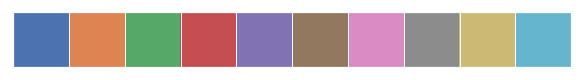

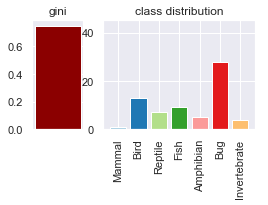

1 [feathers <= 0.5,gini = 0.776,samples = 39,value = [1, 13, 7, 9, 5, 0, 4],class = Bird>, fillcolor="#b7e53922"] 
['1', ' 13', ' 7', ' 9', ' 5', ' 0', ' 4']


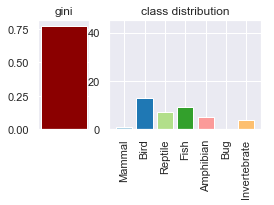

2 [fins <= 0.5,gini = 0.746,samples = 26,value = [1, 0, 7, 9, 5, 0, 4],class = Fish>, fillcolor="#39e5e21b"] 
['1', ' 0', ' 7', ' 9', ' 5', ' 0', ' 4']


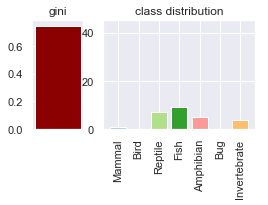

3 [backbone <= 0.5,gini = 0.685,samples = 17,value = [1, 0, 7, 0, 5, 0, 4],class = Bug>, fillcolor="#39e54d2a"] 
['1', ' 0', ' 7', ' 0', ' 5', ' 0', ' 4']


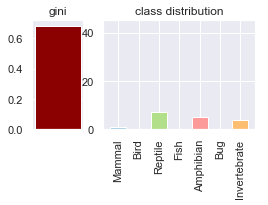

4 [predator <= 0.5,gini = 0.486,samples = 12,value = [0, 0, 7, 0, 5, 0, 0],class = Bug>, fillcolor="#39e54d49"] 
['0', ' 0', ' 7', ' 0', ' 5', ' 0', ' 0']


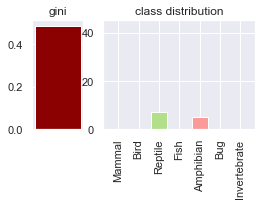

5 [gini = 0.0,samples = 6,value = [0, 0, 6, 0, 0, 0, 0],class = Bug>, fillcolor="#39e54dff"] 
['0', ' 0', ' 6', ' 0', ' 0', ' 0', ' 0']


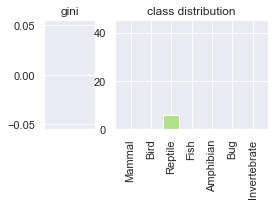

6 [airborne <= 0.5,gini = 0.278,samples = 6,value = [0, 0, 1, 0, 5, 0, 0],class = Invertebrate>, fillcolor="#3956e5cc"] 
['0', ' 0', ' 1', ' 0', ' 5', ' 0', ' 0']


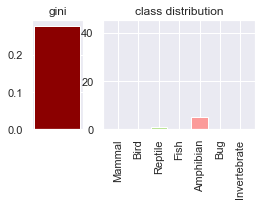

7 [gini = 0.0,samples = 5,value = [0, 0, 0, 0, 5, 0, 0],class = Invertebrate>, fillcolor="#3956e5ff"] 
['0', ' 0', ' 0', ' 0', ' 5', ' 0', ' 0']


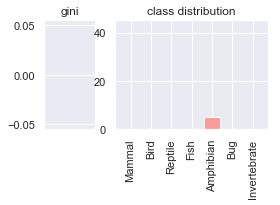

8 [gini = 0.0,samples = 1,value = [0, 0, 1, 0, 0, 0, 0],class = Bug>, fillcolor="#39e54dff"] 
['0', ' 0', ' 1', ' 0', ' 0', ' 0', ' 0']


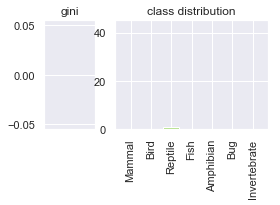

9 [tail <= 0.5,gini = 0.32,samples = 5,value = [1, 0, 0, 0, 0, 0, 4],class = Reptile>, fillcolor="#e53986bf"] 
['1', ' 0', ' 0', ' 0', ' 0', ' 0', ' 4']


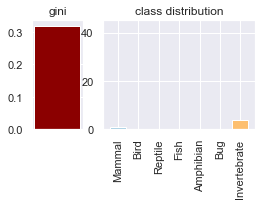

10 [gini = 0.0,samples = 1,value = [1, 0, 0, 0, 0, 0, 0],class = Amphibian>, fillcolor="#e58139ff"] 
['1', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0']


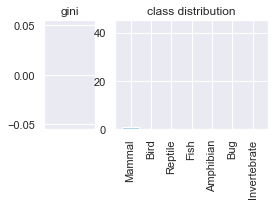

11 [gini = 0.0,samples = 4,value = [0, 0, 0, 0, 0, 0, 4],class = Reptile>, fillcolor="#e53986ff"] 
['0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 4']


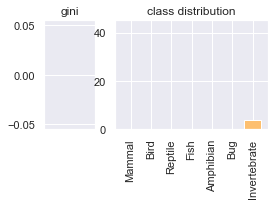

12 [gini = 0.0,samples = 9,value = [0, 0, 0, 9, 0, 0, 0],class = Fish>, fillcolor="#39e5e2ff"] 
['0', ' 0', ' 0', ' 9', ' 0', ' 0', ' 0']


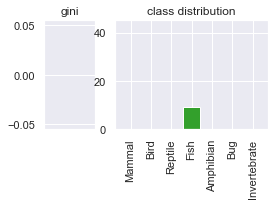

13 [gini = 0.0,samples = 13,value = [0, 13, 0, 0, 0, 0, 0],class = Bird>, fillcolor="#b7e539ff"] 
['0', ' 13', ' 0', ' 0', ' 0', ' 0', ' 0']


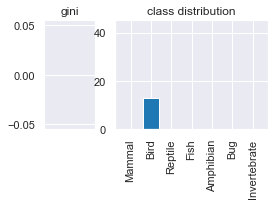

14 [gini = 0.0,samples = 28,value = [0, 0, 0, 0, 0, 28, 0],class = Mammal>, fillcolor="#b139e5ff"] 
['0', ' 0', ' 0', ' 0', ' 0', ' 28', ' 0']


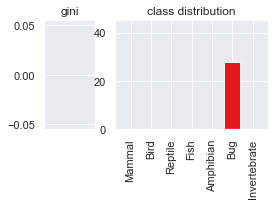

[4, 20, 4, 13, 10, 2, 5]
[0, 0, 4, 0, 0, 39, 0]
[4, 0, 8, 13, 10, 41, 5]
[0, 20, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 40, 1]
[4, 20, 8, 13, 9, 1, 4]
[4, 20, 8, 13, 10, 0, 5]
[0, 0, 0, 0, 0, 41, 0]
[4, 4, 2, 13, 10, 39, 5]
[0, 16, 6, 0, 0, 2, 0]
[0, 14, 8, 0, 4, 35, 4]
[4, 6, 0, 13, 6, 6, 1]
[1, 11, 7, 4, 2, 19, 1]
[3, 9, 1, 9, 8, 22, 4]
[0, 20, 8, 0, 10, 1, 1]
[4, 0, 0, 13, 0, 40, 4]
[0, 0, 8, 0, 10, 0, 0]
[4, 20, 0, 13, 0, 41, 5]
[0, 0, 0, 13, 7, 0, 1]
[4, 20, 8, 0, 3, 41, 4]
[3, 20, 6, 12, 8, 41, 3]
[1, 0, 2, 1, 2, 0, 2]
[4, 20, 8, 0, 10, 37, 5]
[0, 0, 0, 13, 0, 4, 0]
[3, 0, 8, 0, 9, 6, 0]
[1, 20, 0, 13, 1, 35, 5]
[4, 17, 7, 12, 10, 33, 5]
[0, 3, 1, 1, 0, 8, 0]
[4, 14, 8, 9, 9, 9, 4]
[0, 6, 0, 4, 1, 32, 1]


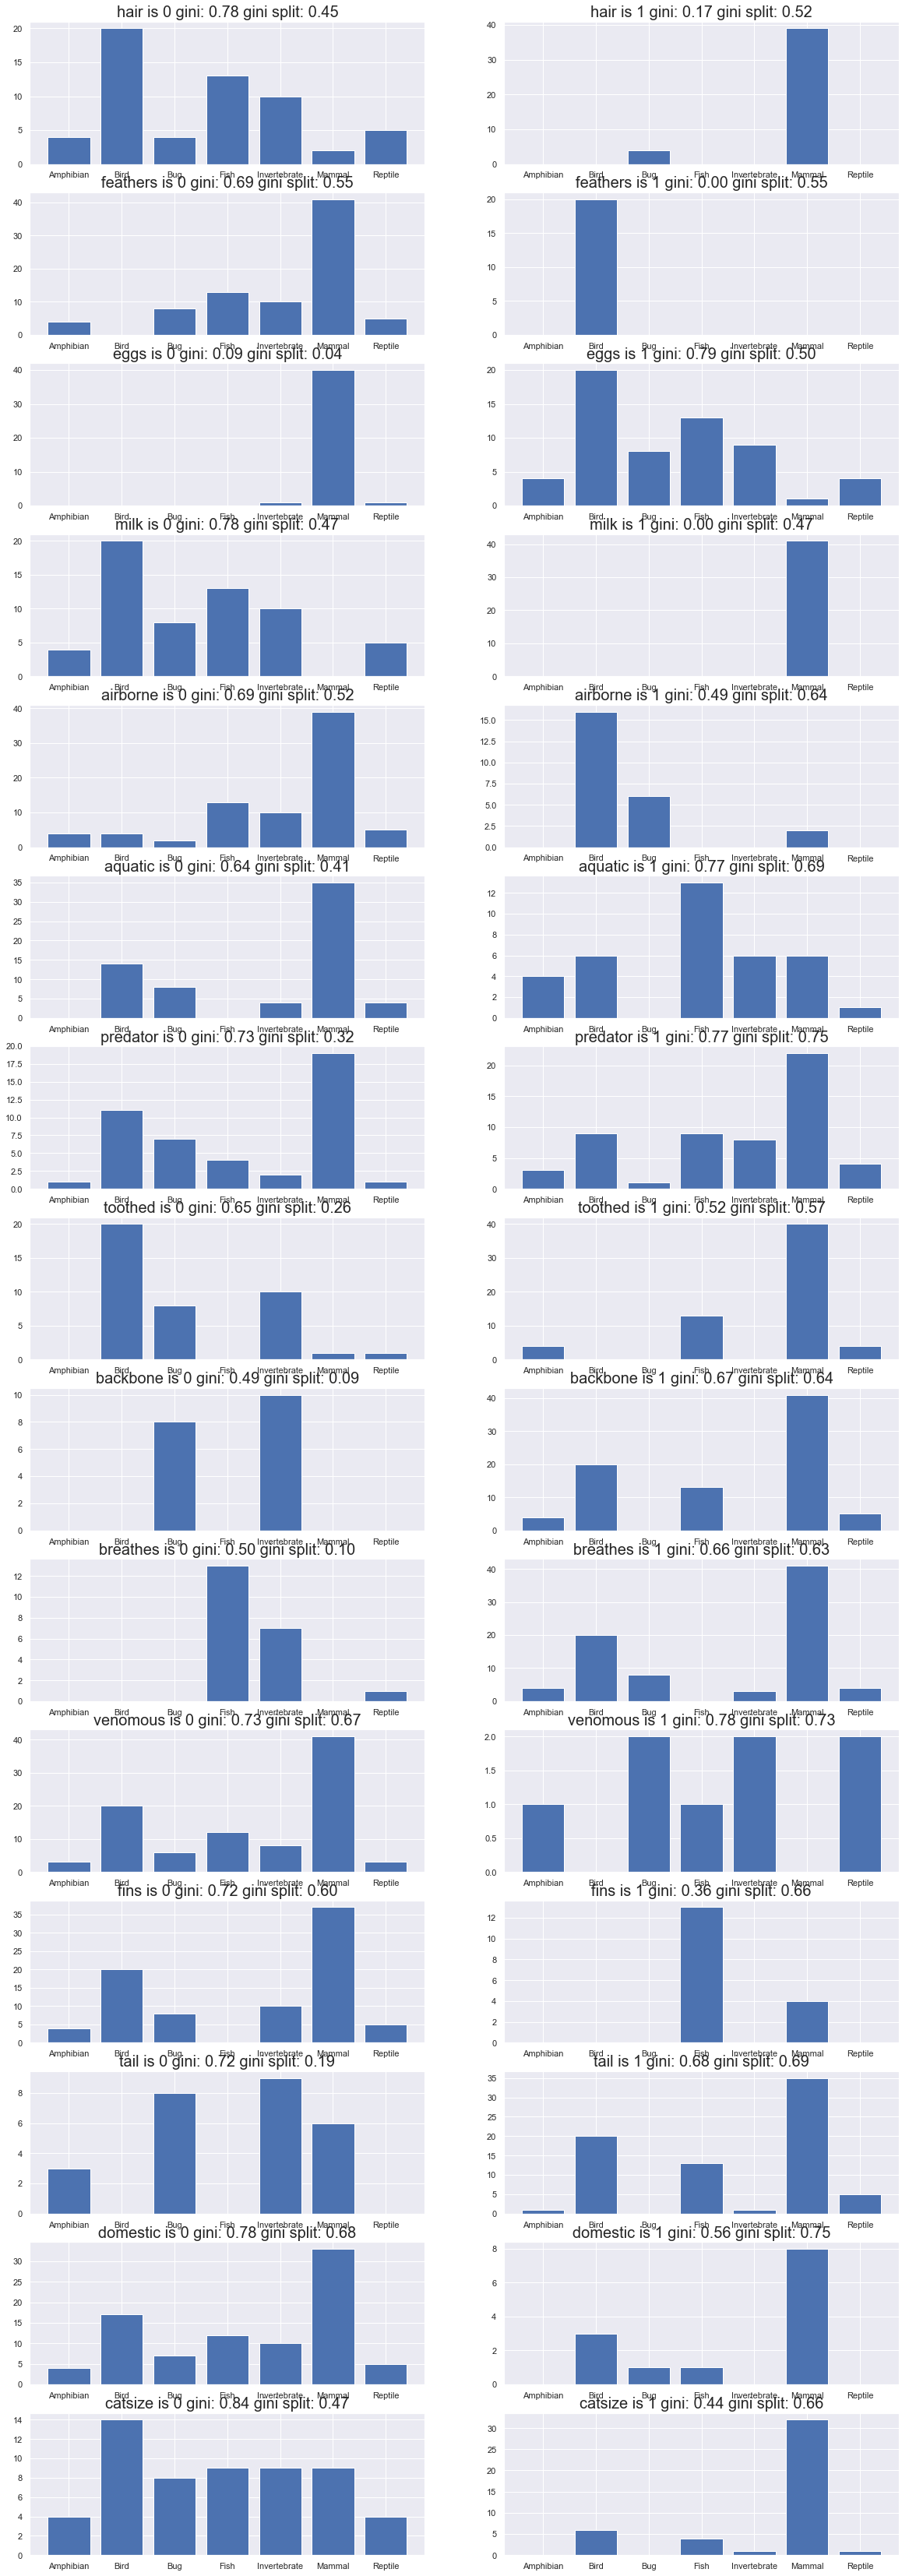

[0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 39, 0]
[0, 0, 0, 0, 0, 40, 0]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 39, 0]
[0, 0, 0, 0, 0, 2, 0]
[0, 0, 0, 0, 0, 35, 0]
[0, 0, 0, 0, 0, 6, 0]
[0, 0, 0, 0, 0, 19, 0]
[0, 0, 0, 0, 0, 22, 0]
[0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 40, 0]
[0, 0, 0, 0, 0, 37, 0]
[0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 6, 0]
[0, 0, 0, 0, 0, 35, 0]
[0, 0, 0, 0, 0, 33, 0]
[0, 0, 0, 0, 0, 8, 0]
[0, 0, 0, 0, 0, 9, 0]
[0, 0, 0, 0, 0, 32, 0]


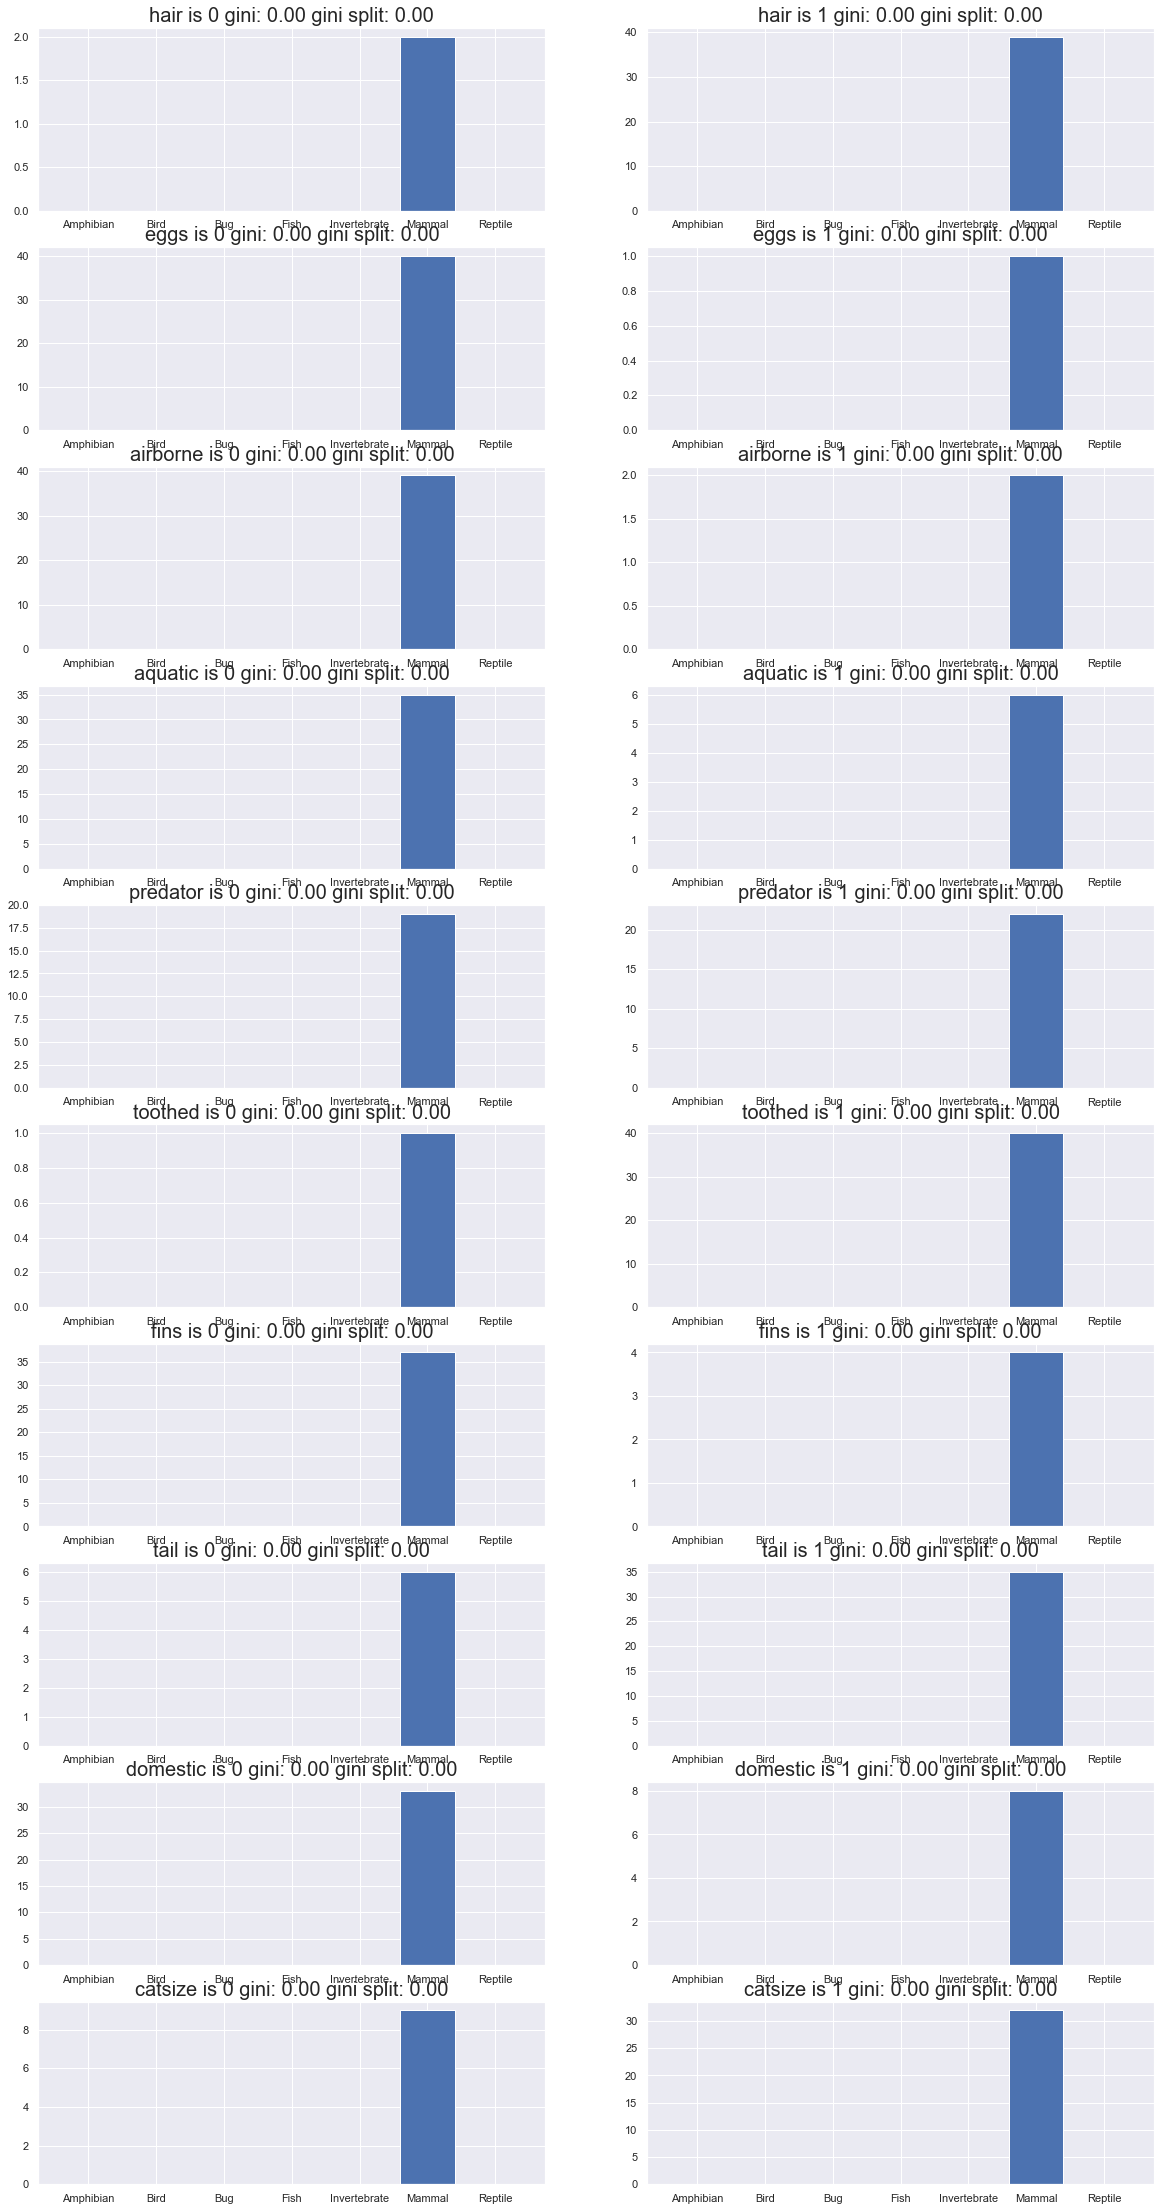

[4, 20, 4, 13, 10, 0, 5]
[0, 0, 4, 0, 0, 0, 0]
[4, 0, 8, 13, 10, 0, 5]
[0, 20, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 1]
[4, 20, 8, 13, 9, 0, 4]
[4, 4, 2, 13, 10, 0, 5]
[0, 16, 6, 0, 0, 0, 0]
[0, 14, 8, 0, 4, 0, 4]
[4, 6, 0, 13, 6, 0, 1]
[1, 11, 7, 4, 2, 0, 1]
[3, 9, 1, 9, 8, 0, 4]
[0, 20, 8, 0, 10, 0, 1]
[4, 0, 0, 13, 0, 0, 4]
[0, 0, 8, 0, 10, 0, 0]
[4, 20, 0, 13, 0, 0, 5]
[0, 0, 0, 13, 7, 0, 1]
[4, 20, 8, 0, 3, 0, 4]
[3, 20, 6, 12, 8, 0, 3]
[1, 0, 2, 1, 2, 0, 2]
[4, 20, 8, 0, 10, 0, 5]
[0, 0, 0, 13, 0, 0, 0]
[3, 0, 8, 0, 9, 0, 0]
[1, 20, 0, 13, 1, 0, 5]
[4, 17, 7, 12, 10, 0, 5]
[0, 3, 1, 1, 0, 0, 0]
[4, 14, 8, 9, 9, 0, 4]
[0, 6, 0, 4, 1, 0, 1]


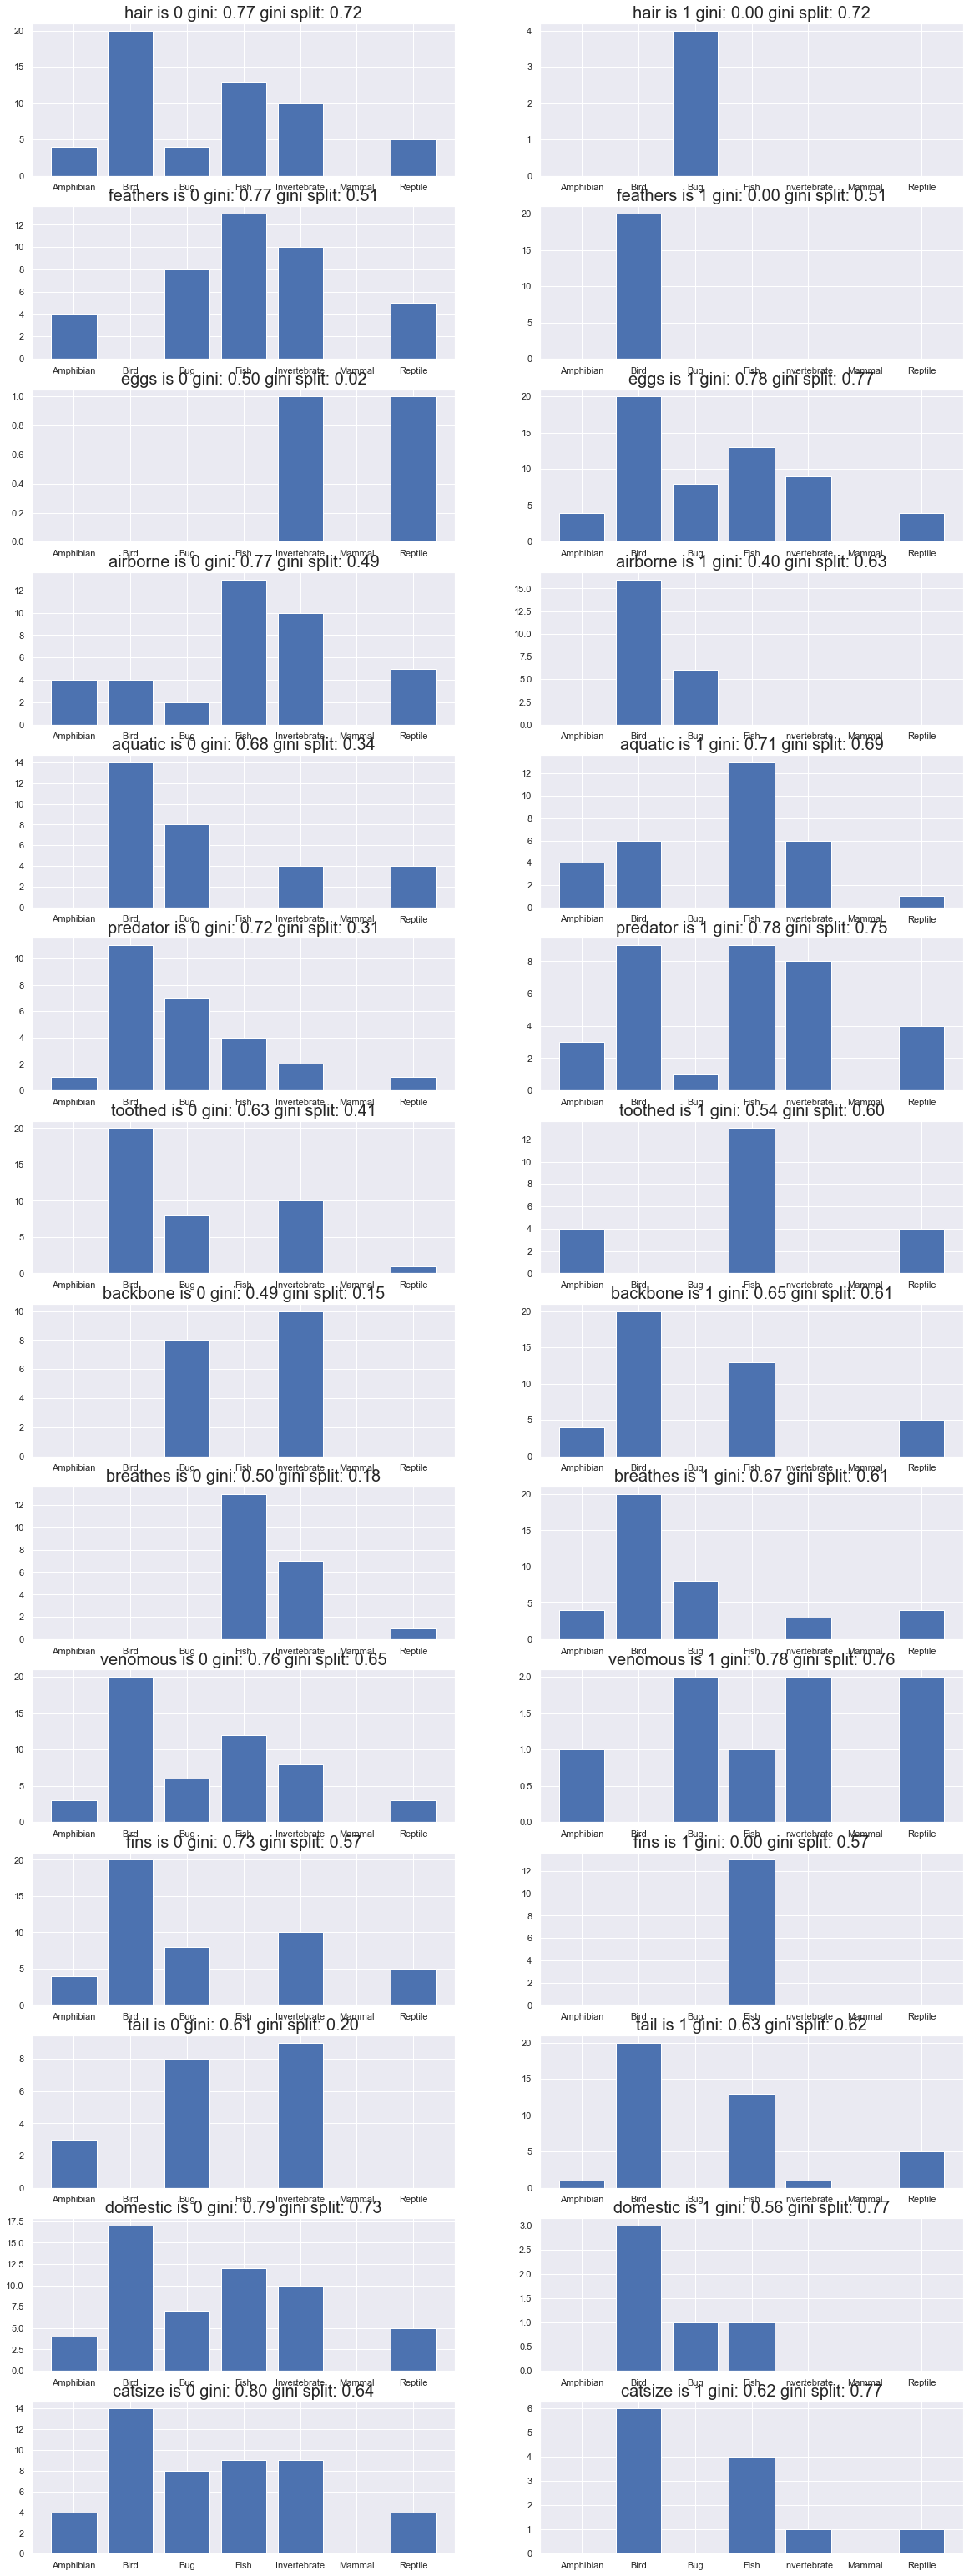

'var config = {container: "#basic-example", levelSeparation: 200, connectors: {type: "curve", style: { "stroke-width": 5}}, node: { HTMLclass: "nodeExample1"}}, node0 = {text: { gini: "gini:0.749", samples: "samples: 67", attribute: "attribute: milk <= 0.5", class_name: "class_name: Mammal", value: "value: [1, 13, 7, 9, 5, 28, 4]"},connectors: {type: "curve", style: {"stroke-width": 13.4}},image:"plots/gini0.png"},node1 = {parent: node0, text: {gini: "gini: 0.776", samples: "samples: 39", attribute: "attribute: feathers <= 0.5", class_name: "class_name: Bird", value: "value: [1, 13, 7, 9, 5, 0, 4]"},connectors: {type: "curve", style: {"stroke-width": 7.8}},image:"plots/gini1.png"},node2 = {parent: node1, text: {gini: "gini: 0.746", samples: "samples: 26", attribute: "attribute: fins <= 0.5", class_name: "class_name: Fish", value: "value: [1, 0, 7, 9, 5, 0, 4]"},connectors: {type: "curve", style: {"stroke-width": 5.2}},image:"plots/gini2.png"},node3 = {parent: node2, text: {gini: "gini:

In [4]:
dot_string= dot_data.getvalue()
x = dot_string.replace("&le;", "<=") #.replace("&#35;", "->")
x = x.replace("\n", "")
x = x.replace("<br/>", ",")
x = x.replace("label=<", "")
x = x.split(";")
x = x[2:-1]

import re
edge_list =[]
node_list =[]
element_regex = re.compile(r'.+->.+')
for i in x:
    if element_regex.match(i):
        edge_list.append(i)
    else:
        node_list.append(i)

edge_df = pd.DataFrame(columns=['current_node', 'parent_node'])
for i in range(0, len(edge_list)):
    print(edge_list[i])
    pattern = "(\d+)"
    a = re.findall(pattern, edge_list[i])
    source = a[0]
    destination = a[1]
    edge_df = edge_df.append({'current_node': destination, 'parent_node': source}, ignore_index=True)
edge_df


import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


x=np.arange(10)
x.shape
np.ones(x.shape)*0.4



import seaborn as sns; sns.set()
sns.palplot(sns.color_palette())
def get_node_string(orig):
    print(orig)
    
    # parse and retrieve value
    node_name = re.search('^\d+', orig).group(0)
    samples = re.search('samples = (\d+)', orig).group(1)
    gini = re.search('gini = (\d+.\d+)', orig).group(1)
    class_name = re.search('class = (\w+)', orig).group(1)
    color = re.search('fillcolor=(.+")', orig).group(1)
    value =  re.search( 'value = (.+]),', orig).group(1)
    new_value = value.replace('[', '').replace(']', '').split(",")
    
    
    #make figure:
    fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 3]}, figsize=(4, 2))
    
    #gini plot
    ax1.set_title('gini')
    ax1.bar(0, float(gini), color='darkred')
    ax1.get_xaxis().set_visible(False)
    
    
    #class distribution plot
    ax2.set_title('class distribution')
    plot_class_names = list(class_only['class_name'])
    _X = np.arange(len(plot_class_names))
    print(new_value)
    new_new_value = [int(x) for x in new_value]
    ax2.bar(plot_class_names, new_new_value, color=sns.color_palette("Paired")[0:8])
    ax2.set_ylim(0, 45)

   
    
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
    
    plot_name = 'plots/'+'gini' + str(node_name) + '.png'
    plt.show()
    
    temp_row = {'current_node': node_name, 'gini': gini, 'samples': samples, 'class_name': class_name, 'color': color, 'value': value, 'plot_name': plot_name}
    
    #check if gini is in the first result
    s = orig.split(',')
    pattern = 'gini'
    gini_match = re.search(pattern, s[0])
    
    if gini_match is None: 
        attribute = s[0].split("[")[1]
        temp_row['attribute']= attribute
   
        
    return (temp_row, fig)



ult_df = pd.DataFrame(columns=['current_node', 'attribute', 'gini', 'samples', 'value', 'class_name', 'color', 'plot_name'])
# ult_df = df_.fillna(0) # with 0s rather than NaNs
ult_df

node_list

ult_list = {}
for i in range(0, len(node_list)):
    (node_string, fig) = get_node_string(node_list[i])
    ult_df = ult_df.append(node_string, ignore_index=True)
    fig.savefig('../treant-js/examples/decision-tree/' + node_string['plot_name'], pad_inches=0.4, bbox_inches="tight")

ult_df

new_df = ult_df.merge(edge_df, on='current_node', how='outer')
new_df
# new_df.fillna(0)

make_attribute_view(df_class, 'node0')

make_attribute_view(df_class[df_class['milk'] > 0.5], 'node18')

make_attribute_view(df_class[df_class['milk'] <= 0.5], 'node1')

full_string = ""
for index, row in new_df.iterrows():
    node_name = row['current_node']
    attribute = row['attribute']
    plot_name = row['plot_name']
    samples = row['samples']
    class_name = row['class_name']
    value = row['value']
    gini = row['gini']
    if node_name=='0':
        result = 'node'+ str(node_name) + ' = {'\
        + 'text: { gini: "gini:' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},'
    else:
        parent = row['parent_node']
        result = 'node'+ str(node_name) + ' = {' + "parent: node" + str(parent) \
        + ', text: {' \
        + 'gini: "gini: ' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},' 
        
        
#     print(result)
    full_string+=result
    
    
#         + 'connectors: {type: "step", style: {"stroke-width": 2}},' \


first_part = 'var config = {container: "#basic-example", levelSeparation: 200, connectors: {type: "curve", style: { "stroke-width": 5}}, node: { HTMLclass: "nodeExample1"}}, '
last_part = "chart_config = [config," + ','.join(['node' + str(x) for x in list(new_df['current_node'].keys())])+'];'
whole_string = first_part + full_string + last_part
text_file = open("tree.json", "w")
text_file.write(whole_string)
text_file.close()

whole_string

In [5]:
import matplotlib
print(matplotlib.__version__)

3.0.3
